# Major Project on Machine Learning

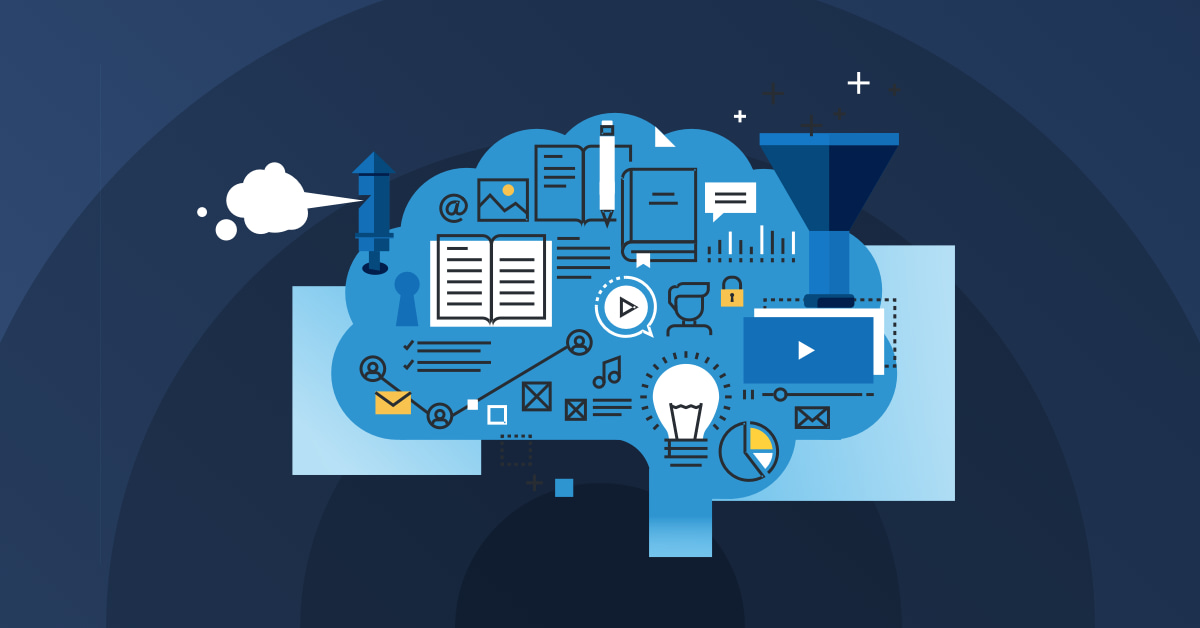

# Objective

__Prediction of the costs of used cars given the data collected from various sources and distributed across various locations in India.__

# Code

## Importing Necessary Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sb
import scipy.stats as stats
import math
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
plt.rcParams.update({"font.size" : 15})
sb.set(rc={'figure.figsize':(7,7)})
sb.set(font_scale=1.3, color_codes=True, rc=None)
k_fold = KFold(n_splits=5, shuffle=False)

## Data Provided

In [63]:
train = pd.read_csv("Data_Train.csv")
test = pd.read_csv("Data_Test.csv")

In [64]:
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [65]:
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0


In [5]:
test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object

## Finding the Outliers in the train and test data and cleaning it.

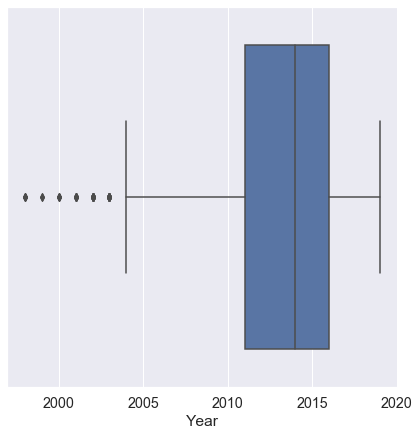

In [6]:
sb.boxplot(x=train['Year'])

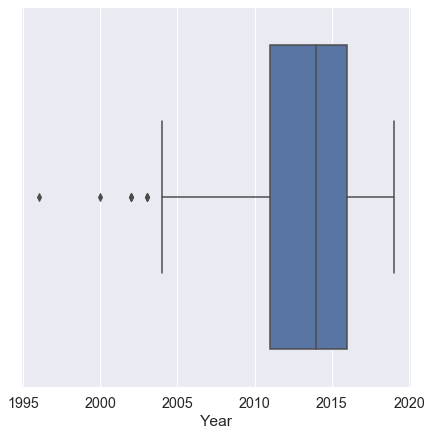

In [7]:
sb.boxplot(x=test['Year'])

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

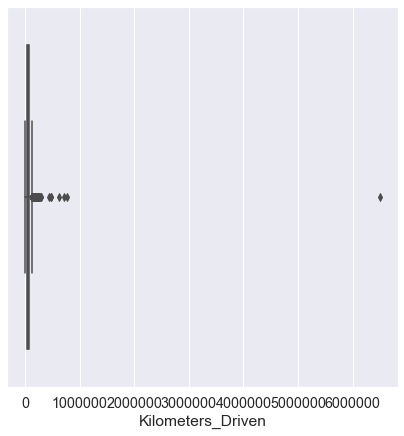

In [8]:

sb.boxplot(x=train['Kilometers_Driven'])
train['Kilometers_Driven'].describe()


In [9]:
#removing fartherst outlier
train=train[train['Kilometers_Driven']<200000]
train.shape

(5982, 12)

count      1234.000000
mean      58507.288493
std       35598.702098
min        1000.000000
25%       34000.000000
50%       54572.500000
75%       75000.000000
max      350000.000000
Name: Kilometers_Driven, dtype: float64

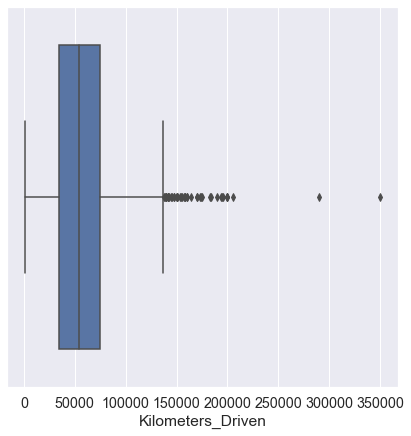

In [10]:
sb.boxplot(x=test['Kilometers_Driven'])
test['Kilometers_Driven'].describe()

In [11]:
#removing fathest outliers
test=test[test['Kilometers_Driven']<200000]
test.shape

(1228, 11)

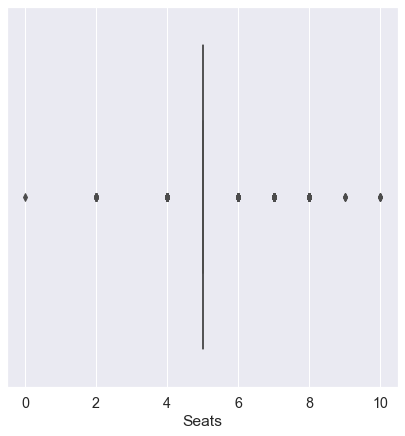

In [12]:
sb.boxplot(x=train['Seats'])


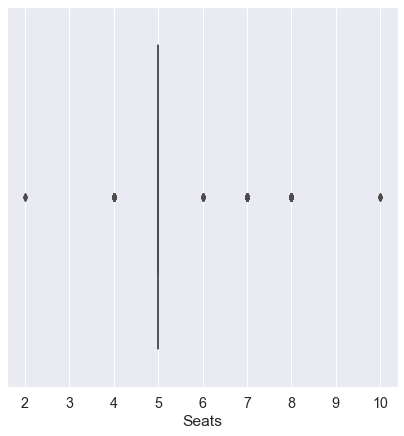

In [13]:
sb.boxplot(x=test['Seats'])

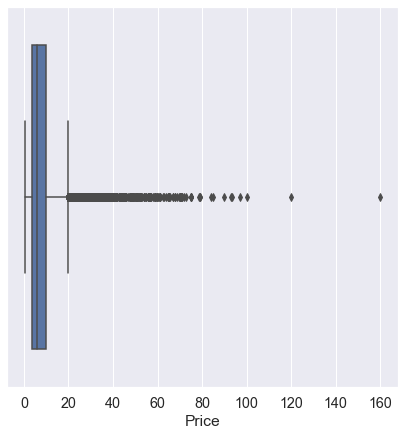

In [14]:
sb.boxplot(x=train['Price'])
train=train[train['Price']<=100]

In [15]:
Q1 = train['Year'].quantile(0.25)
Q3 = train['Year'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


5.0


In [16]:
train.shape

(5980, 12)

In [17]:
train = train[~((train['Year'] < (Q1 - 1.5 * IQR)))]
train.shape


(5932, 12)

In [18]:
train.shape

(5932, 12)

In [19]:
Q1t = test['Year'].quantile(0.25)
Q3t = test['Year'].quantile(0.75)
IQRt = Q3t - Q1t
print(IQRt)

5.0


In [20]:
test.shape

(1228, 11)

In [21]:
test = test[~((test['Year'] < (Q1 - 1.5 * IQR)))]
test.shape

(1220, 11)

In [22]:
test.shape

(1220, 11)

In [23]:
# data types of the columns 
print(train.info(), "\n")
print(test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5932 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5932 non-null   object 
 1   Location           5932 non-null   object 
 2   Year               5932 non-null   int64  
 3   Kilometers_Driven  5932 non-null   int64  
 4   Fuel_Type          5932 non-null   object 
 5   Transmission       5932 non-null   object 
 6   Owner_Type         5932 non-null   object 
 7   Mileage            5930 non-null   object 
 8   Engine             5900 non-null   object 
 9   Power              5900 non-null   object 
 10  Seats              5894 non-null   float64
 11  Price              5932 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 602.5+ KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dty

In [24]:
# describing the dataset
print(train.describe(),"\n")
print(test.describe())

              Year  Kilometers_Driven        Seats        Price
count  5932.000000        5932.000000  5894.000000  5932.000000
mean   2013.477242       56023.342717     5.273838     9.515329
std       3.081480       31343.720280     0.797504    10.949252
min    2004.000000         171.000000     0.000000     0.440000
25%    2012.000000       33541.750000     5.000000     3.500000
50%    2014.000000       52465.500000     5.000000     5.675000
75%    2016.000000       72000.000000     5.000000    10.000000
max    2019.000000      199000.000000    10.000000   100.000000 

              Year  Kilometers_Driven        Seats
count  1220.000000        1220.000000  1209.000000
mean   2013.481967       57409.950820     5.280397
std       3.029606       32987.532811     0.812743
min    2004.000000        1000.000000     2.000000
25%    2011.000000       33937.500000     5.000000
50%    2014.000000       54000.000000     5.000000
75%    2016.000000       73163.250000     5.000000
max    2019.00

In [25]:
# no. of unique items present in the categorical columns
print(train.select_dtypes('object').nunique(), "\n")
print(test.select_dtypes('object').nunique())

Name            1839
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          441
Engine           141
Power            369
dtype: int64 

Name            759
Location         11
Fuel_Type         4
Transmission      2
Owner_Type        4
Mileage         300
Engine          103
Power           248
dtype: int64


In [26]:
# checking for null values
def isnull():
    train_null = train.isnull().sum()
    test_null = test.isnull().sum()
    print(train_null[train_null > 0], "\n")
    print(test_null[test_null > 0], "\n")
isnull()

Mileage     2
Engine     32
Power      32
Seats      38
dtype: int64 

Engine    10
Power     10
Seats     11
dtype: int64 



## Visualizing the datasets

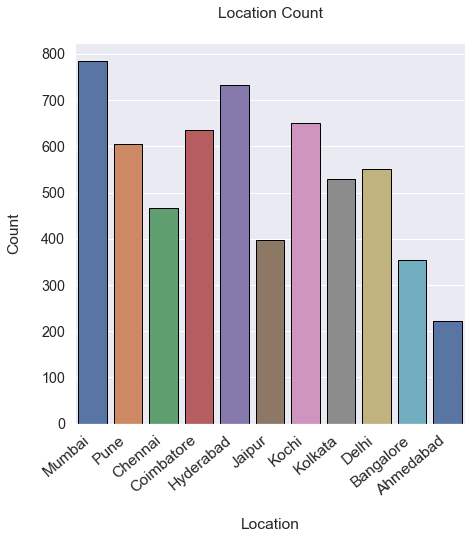

In [27]:
sb.countplot(x='Location', data = train, palette="deep", edgecolor = "black")
plt.title("Location Count", y=1.05)
plt.xlabel("Location",labelpad=20)
plt.ylabel("Count",labelpad=20)
plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.show()

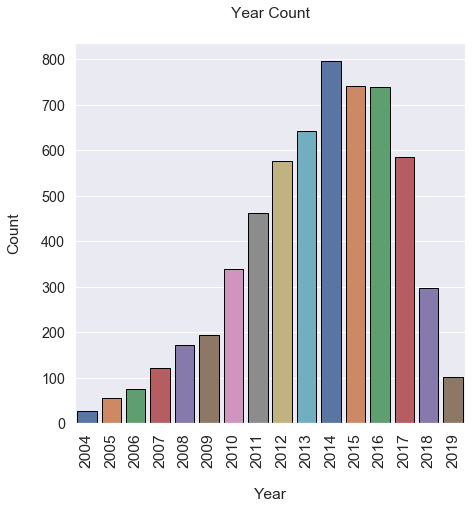

In [28]:
sb.countplot(x='Year', data = train, palette="deep", edgecolor = "black")
plt.title("Year Count", y=1.05)
plt.xlabel("Year",labelpad=20)
plt.ylabel("Count",labelpad=20)
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'  
)
plt.show()

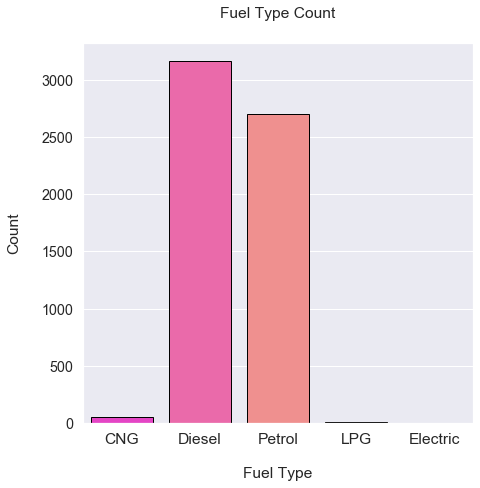

In [29]:
sb.countplot(x='Fuel_Type', data = train, palette="spring", edgecolor = "black")
plt.title("Fuel Type Count", y=1.05)
plt.xlabel("Fuel Type",labelpad=20)
plt.ylabel("Count",labelpad=20)
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'  
)
plt.show()

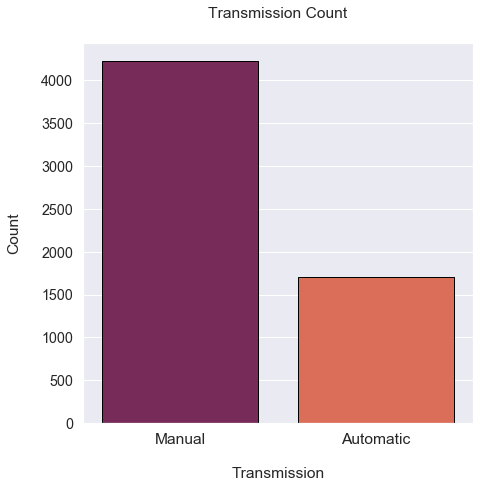

In [30]:
sb.countplot(x='Transmission', data = train, palette="rocket", edgecolor = "black")
plt.title("Transmission Count", y=1.05)
plt.xlabel("Transmission",labelpad=20)
plt.ylabel("Count",labelpad=20)
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'  
)
plt.show()

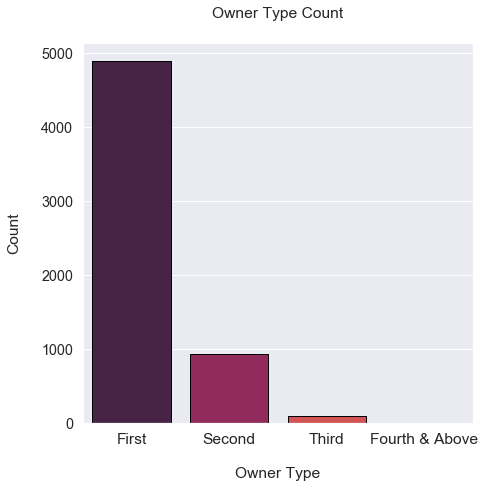

In [31]:
sb.countplot(x='Owner_Type', data = train, palette="rocket", edgecolor = "black")
plt.title("Owner Type Count", y=1.05)
plt.xlabel("Owner Type",labelpad=20)
plt.ylabel("Count",labelpad=20)
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='medium'  
)
plt.show()


### Data Cleaning

#### Filling out the Null values

In [32]:
# You can either drop the null values or use Mean/Median to fill them
train["Mileage"].fillna(train.loc[:,"Mileage"].mode()[0], inplace = True)
train["Engine"].fillna(train.loc[:,"Engine"].mode()[0], inplace = True)
train["Power"].fillna(train.loc[:,"Power"].mode()[0], inplace = True)
train["Seats"].fillna(train.loc[:,"Seats"].mode()[0], inplace = True)

test["Engine"].fillna(test.loc[:,"Engine"].mode()[0], inplace = True)
test["Power"].fillna(test.loc[:,"Power"].mode()[0], inplace = True)
test["Seats"].fillna(test.loc[:,"Seats"].mode()[0], inplace = True)


#### Removing SI Units from Mileage, Engine, Power

In [33]:
train["Mileage"] = train.loc[:,"Mileage"].astype(str).str.split(" ").str[0]
train["Mileage"] = train.loc[:,"Mileage"].astype(float)

test["Mileage"] = test.loc[:,"Mileage"].astype(str).str.split(" ").str[0]
test["Mileage"] = test.loc[:,"Mileage"].astype(float)

train["Engine"] = train.loc[:,"Engine"].astype(str).str.split(" ").str[0]
train["Engine"] = train.loc[:,"Engine"].astype(int)

test["Engine"] = test.loc[:,"Engine"].astype(str).str.split(" ").str[0]
test["Engine"] = test.loc[:,"Engine"].astype(int)

train["Power"] = train.loc[:,"Power"].astype(str).str.split(" ").str[0]
# Replacing the string Null values in the Power Column
train.loc[train["Power"] == "null", "Power"] = train.loc[:,"Power"].mode()[0]
train["Power"] = train.loc[:,"Power"].astype(float)

test["Power"] = test.loc[:,"Power"].astype(str).str.split(" ").str[0]
# Replacing the string Null values in the Power Column
test.loc[test["Power"] == "null", "Power"] = test.loc[:,"Power"].mode()[0]
test["Power"] = test.loc[:,"Power"].astype(float)


In [34]:
train['Mileage'].describe()

count    5932.000000
mean       18.199380
std         4.536178
min         0.000000
25%        15.290000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

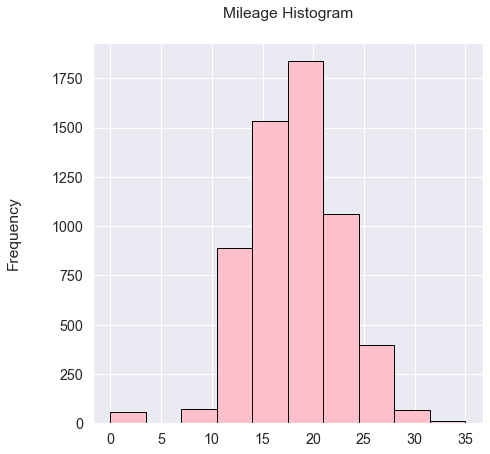

In [35]:
train["Mileage"].plot.hist(bins=10,edgecolor = "black",range = [0,35],color = "pink")
plt.title("Mileage Histogram", y=1.05)
plt.xlabel("",labelpad=30)
plt.ylabel("Frequency",labelpad=30)
plt.show()

### Outliers In Engine Column

- The Minimum Value is the first
- Values Count grater than 3000/4000 is very low

In [36]:
train['Engine'].describe()

count    5932.000000
mean     1617.199090
std       598.110572
min        72.000000
25%      1197.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64

In [37]:
print(train["Engine"].min())
print(train.loc[train["Engine"] > 3000, "Engine"].count())

72
60


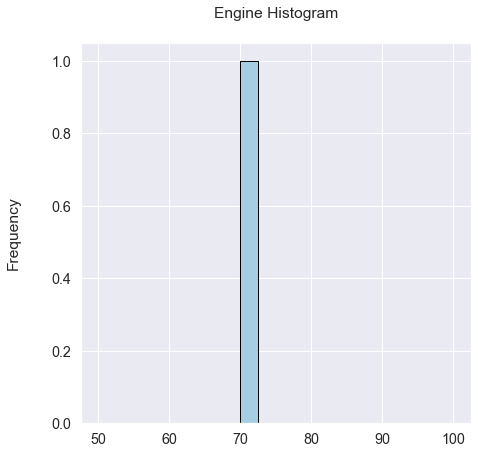

In [38]:
train["Engine"].plot.hist(bins=20,edgecolor = "black",range = [50,100],cmap = "Paired")
plt.title("Engine Histogram", y=1.05)
plt.xlabel("",labelpad=30)
plt.ylabel("Frequency",labelpad=30)
plt.show()

##### Replacing the Minimum value i.e. '72' with mean/median and we could also replace the values greater than '3000' later on.

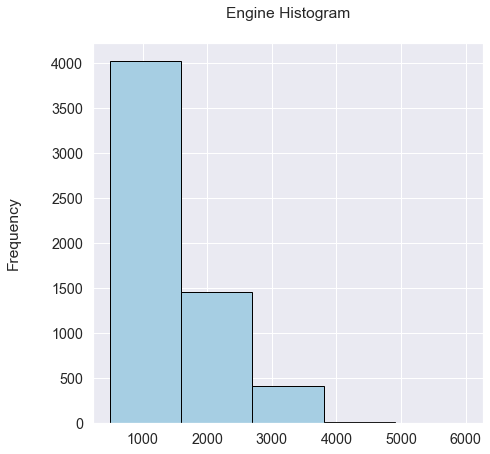

In [39]:
train.loc[train["Engine"] == 72, "Engine"] = train["Engine"].mean()

train["Engine"].plot.hist(bins=5,edgecolor = "black",range = [500,6000],cmap = "Paired")
plt.title("Engine Histogram", y=1.05)
plt.xlabel("",labelpad=30)
plt.ylabel("Frequency",labelpad=30)
plt.show()

### Outliers In Power Column

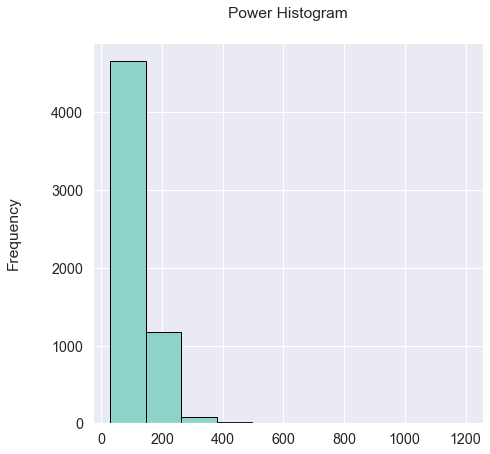

In [40]:
train["Power"].plot.hist(bins=10,edgecolor = "black",range = [30,1200],cmap = "Set3")
plt.title("Power Histogram", y=1.05)
plt.xlabel("",labelpad=30)
plt.ylabel("Frequency",labelpad=30)
plt.show()

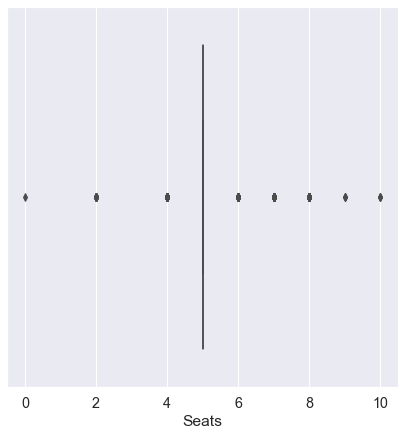

In [41]:
sb.boxplot(x=train['Seats'])

- No values exists between the range 560 and 1100

In [42]:
print(train.loc[(train["Power"] > 560) & (train["Power"] < 1100), "Power"])

Series([], Name: Power, dtype: float64)


### Outliers in Seat Column

- Car with '0' seat is the possible outlier here
- Replacing it with mean/mode/median

In [43]:
print(train.loc[train["Seats"] == 0, "Seats"].count())


1


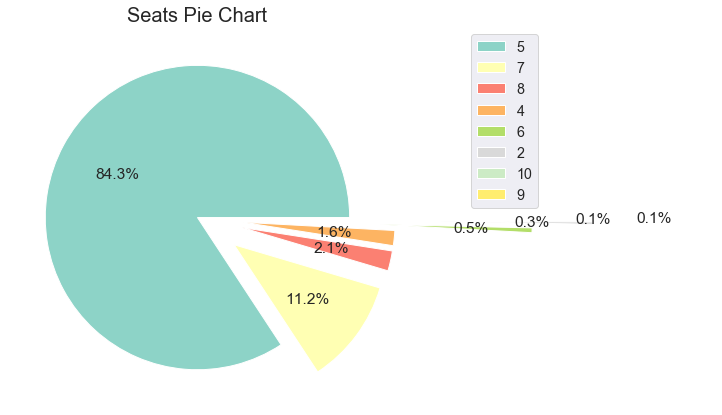

In [44]:
# Replacing the '0' seat
train.loc[train["Seats"] == 0, "Seats"] = train["Seats"].mode()[0]

ExplodeTuple = (0.0, 0.3, 0.3, 0.3, 1.2, 1.6, 2, 2.4)
train["Seats"].value_counts().plot.pie(labels = None,autopct='%1.1f%%',frame = False,
                                      shadow=False,figsize=(15, 7), cmap = "Set3", explode = ExplodeTuple)
labels = ["5","7","8","4","6","2","10","9"]
plt.legend(bbox_to_anchor=(1.2,1), loc="upper left", labels = labels)
plt.ylabel("",labelpad=20)
plt.title("Seats Pie Chart", fontsize = 20)
plt.show()


### Trends in Pricing

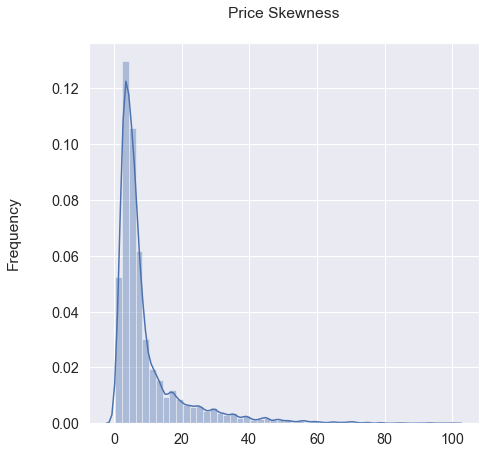

In [45]:
sb.distplot(train["Price"])
plt.title("Price Skewness", y=1.05)
plt.xlabel("",labelpad=30)
plt.ylabel("Frequency",labelpad=30)
plt.show()

### Encoding Features

In [46]:
# Handling Names
train["Name"] = train["Name"].str.split(" ").str[0]
test["Name"] = test["Name"].str.split(" ").str[0]


In [47]:
le = LabelEncoder()
# Training Data
train["Name"] = le.fit_transform(train["Name"])
train["Location"] = le.fit_transform(train["Location"])
train["Fuel_Type"] = le.fit_transform(train["Fuel_Type"])
train["Transmission"] = le.fit_transform(train["Transmission"])
train["Owner_Type"] = le.fit_transform(train["Owner_Type"])
# Testing Data
test["Name"] = le.fit_transform(test["Name"])
test["Location"] = le.fit_transform(test["Location"])
test["Fuel_Type"] = le.fit_transform(test["Fuel_Type"])
test["Transmission"] = le.fit_transform(test["Transmission"])
test["Owner_Type"] = le.fit_transform(test["Owner_Type"])

In [48]:
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,16,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,9,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,8,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,16,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,0,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,16,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
6015,9,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
6016,15,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,16,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0,2.65


In [49]:
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,14,4,2014,40929,0,1,0,32.26,998,58.20,4.0
1,14,3,2013,54493,3,1,2,24.70,796,47.30,5.0
2,24,9,2017,34000,1,1,0,13.68,2393,147.80,7.0
3,24,5,2012,139000,1,1,0,23.59,1364,74.00,5.0
4,8,9,2014,29000,3,1,0,18.50,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,25,5,2011,89411,1,1,0,20.54,1598,103.60,5.0
1230,25,9,2015,59000,3,0,0,17.21,1197,103.60,5.0
1231,18,8,2012,28000,1,1,0,23.08,1461,63.10,5.0
1232,25,10,2013,52262,3,0,3,17.20,1197,103.60,5.0


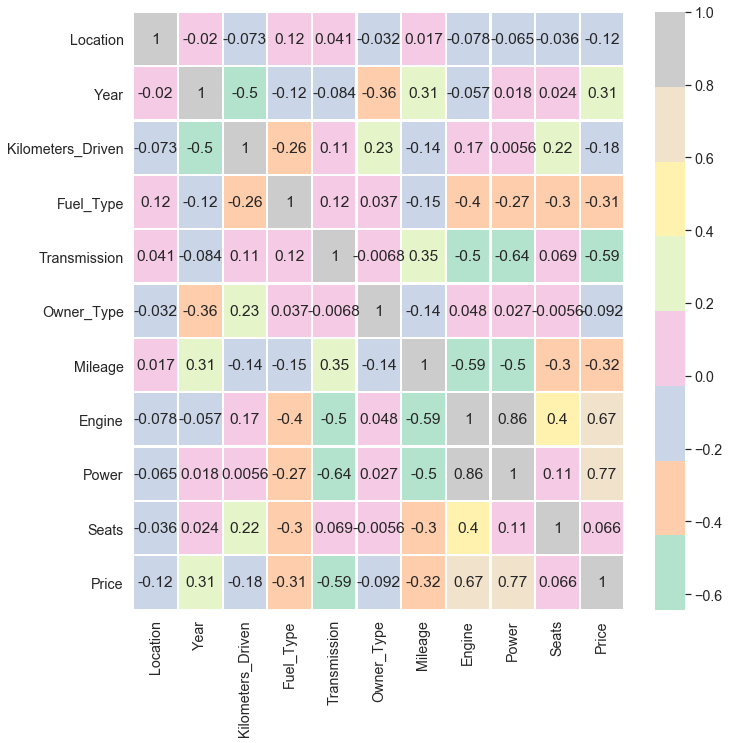

In [50]:
plt.figure(figsize =(11,11))
sb.heatmap(train.drop(columns = ["Name"]).corr(),annot=True,linewidths=1.2 ,cmap = 'Pastel2')
plt.show()

## Modelling

In [51]:
target = train["Price"]
input = train.drop(columns= ["Price"])
x_test = test

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.33, random_state=42)

#### XGBoost

In [53]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.6,
                             learning_rate=0.05,
                             max_depth=5,
                             n_estimators=1100)

score = cross_val_score(model_xgb, X_train, y_train, cv=k_fold, n_jobs=-1)
print(score, "\n")
print("XGB Score:",round(np.mean(score)*100, 2), "\n")

[0.91715805 0.93211645 0.92474666 0.92575172 0.94366706] 

XGB Score: 92.87 



In [54]:
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(x_test)
print(y_pred)
###model_xgb.score(X_train,y_train)

[ 5.308533   3.7376256 13.841782  ...  5.635075   4.8641276 17.97757  ]


In [55]:
# XGBoost MODEL SCORE
model_xgb_score=round(model_xgb.score(X_test,y_test)*100,2)
print('XGBoost MODEL SCORE :',model_xgb_score)

XGBoost MODEL SCORE : 89.45


### Random Forest Regressor

In [56]:
model_rfr = RandomForestRegressor()

score = cross_val_score(model_rfr, X_train, y_train, cv=k_fold, n_jobs=1)
print(score, "\n")
print("Random Forest Regressor Score:",round(np.mean(score)*100, 2), "\n")

[0.90035201 0.90813957 0.90998121 0.91022865 0.92438657] 

Random Forest Regressor Score: 91.06 



In [57]:
model_rfr.fit(input,target)
y_pred = model_rfr.predict(x_test)
print(y_pred)
#model_rfr.score(X_train, y_train)

[ 3.383   2.6422 15.3195 ...  2.7478  4.2047 18.2145]


In [58]:
# RANDOM FOREST REGRESSOR MODEL SCORE
model_rfr_score=round(model_rfr.score(X_test,y_test)*100,2)
print('RANDOM FOREST REGRESSOR MODEL SCORE :',model_rfr_score)

RANDOM FOREST REGRESSOR MODEL SCORE : 98.28


### LGBM Regressor

In [59]:
model_lgb = lgb.LGBMRegressor()

score = cross_val_score(model_lgb, X_train, y_train, cv=k_fold, n_jobs=1)
print(score, "\n")
print("LGBM Score:",round(np.mean(score)*100, 2), "\n")


[0.91142855 0.9179118  0.92419631 0.92632405 0.93293219] 

LGBM Score: 92.26 



In [60]:
model_lgb.fit(X_train, y_train)
y_pred = model_lgb.predict(x_test)
print(y_pred)
#model_lgb.score(X_train, y_train)

[ 4.04442101  3.42532227 14.08457037 ...  3.86918253  5.58309465
 19.29071856]


In [61]:
#LGBM REGRESSOR MODEL SCORE
model_lgb_score=round(model_lgb.score(X_test, y_test)*100,2)
print ('LGBM MODEL SCORE : ',model_lgb_score)

LGBM MODEL SCORE :  88.69


# Summary

The following results were obtained upon prediction of the model-

| Framework                | Prediction Score  |
| -------------------------|------------------:|
| XGBoost                  | 89.45             |
| Random Forest Regressor  | 98.35             |
| LGBM Regressor           | 88.69             |

# Conclusion

From the above result, we can conclude that the model we created seems to work well hence we have further proceeded to deployement.

# Bibliography

1. cloudinary.com(Images)
2. Verzeo(Data)

# Collaborators

- Aditya Bhandarkar
- Anurag  Singh
- Ashish S Chandan
- Chaitra P
- Chirag M
- Gokulakannan S
- Manash
- Monisha P
- Prashanthi Jayakumar
- Saravanan H
- Sarthak Sinha
- Siva Rami Reddy
- Sparsh Gupta
- Tejaswini Balaji
- Udit Thakur

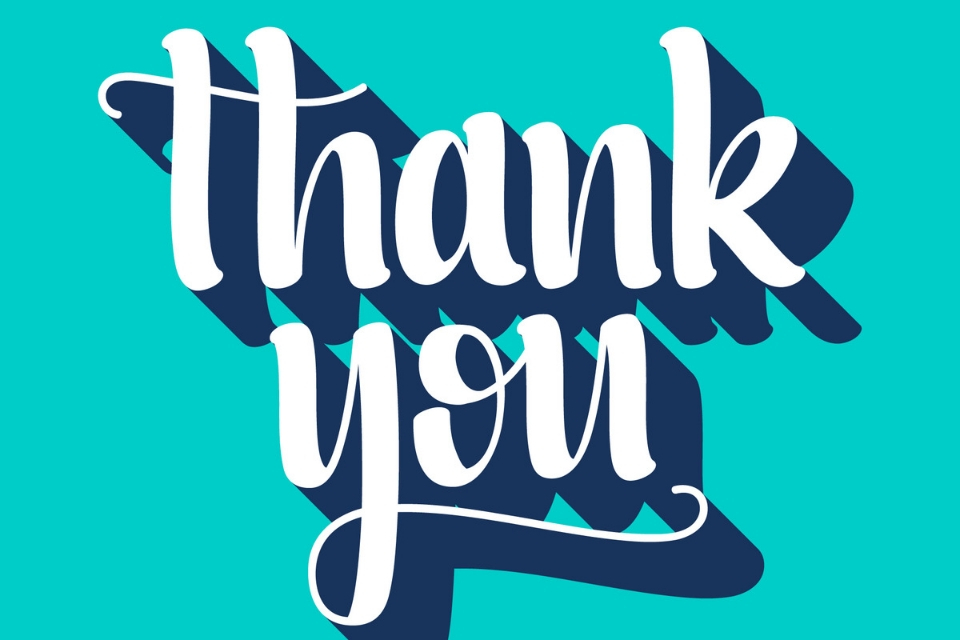